In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score

In [249]:
# Load Dataset
df = pd.read_csv('../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [250]:
df.shape

(1338, 7)

In [251]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [252]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<Axes: ylabel='sex'>

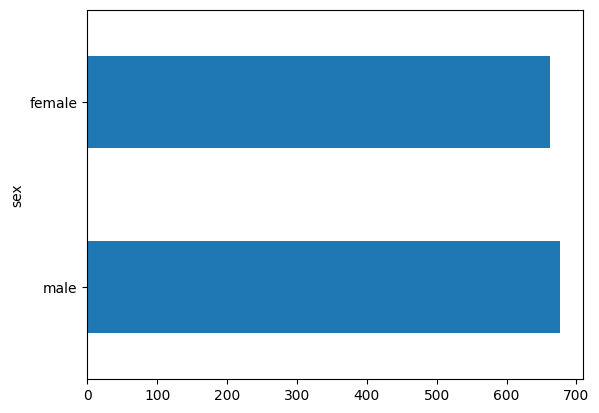

In [253]:
df['sex'].value_counts().plot(kind='barh')

In [254]:
df.select_dtypes('object').columns.tolist()

['sex', 'smoker', 'region']

In [255]:
df.select_dtypes(include=['int64', 'float64']).columns.tolist()

['age', 'bmi', 'children', 'charges']

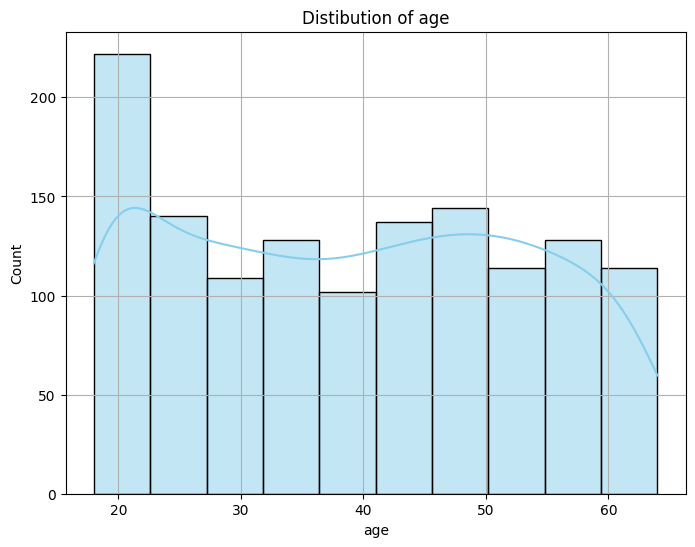

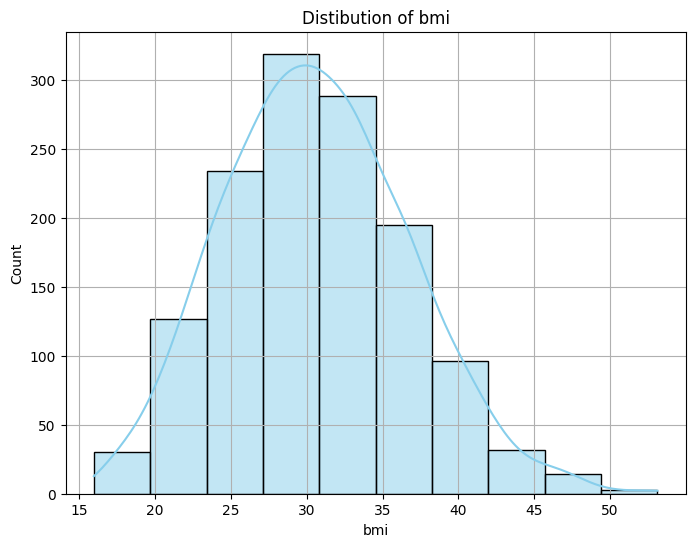

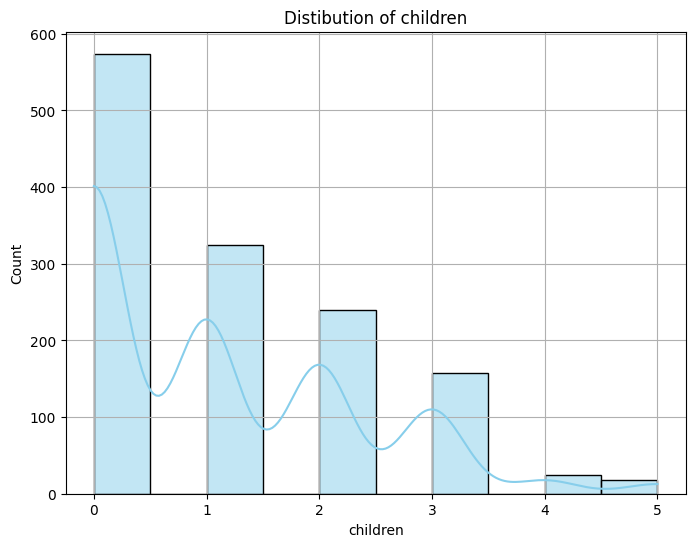

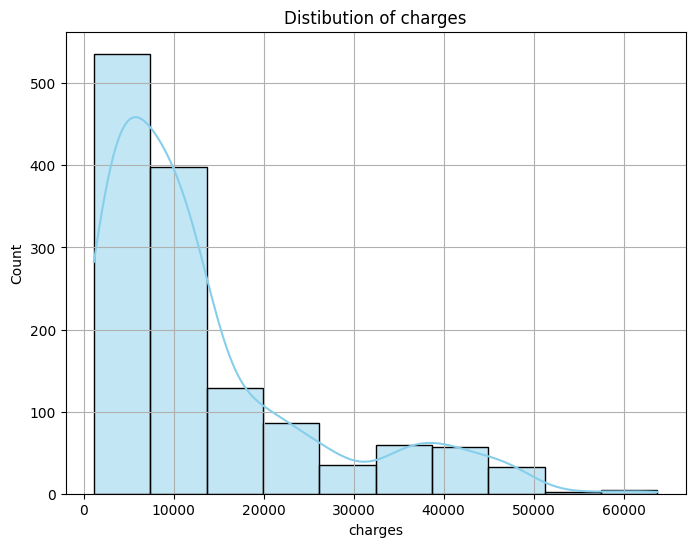

In [256]:
num_col = ['age', 'bmi', 'children', 'charges']

for col in num_col:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df[col], kde=True, color='skyblue', bins=10)
    plt.title(f'Distibution of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

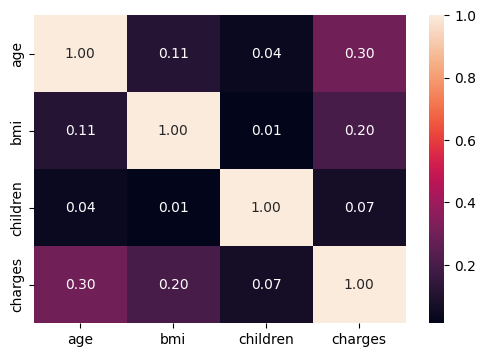

In [257]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

In [258]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], dtype=int)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [259]:
x = df.drop(columns=['charges'], axis=1)
y = df['charges']

In [260]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [261]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [262]:
r2_score(y_test, linear_model.predict(x_test))

0.7835929767120723

### Polynomial

In [263]:
poly = PolynomialFeatures(degree=2, include_bias=True)

x_train_trns = poly.fit_transform(x_train)
x_test_trns = poly.transform(x_test)

In [264]:
linear_model_poly = LinearRegression()
linear_model_poly.fit(x_train_trns, y_train)

LinearRegression()

In [265]:
r2_score(y_test, linear_model_poly.predict(x_test_trns))

0.8665830903164837

### Ridge

In [266]:
ridge = Ridge(alpha=0.01)
ridge.fit(x_train, y_train)
r2_score(y_test, ridge.predict(x_test))

0.7835915357620363

### Lasso

In [267]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
r2_score(y_test, lasso.predict(x_test))

0.7835912737744484

### Save model

In [268]:
import joblib
joblib.dump(linear_model_poly, '../model/medical_model.pkl')

['../model/medical_model.pkl']